In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [43]:
# Important: the first argument should be given as a raw string. 
# So, writing r'C:/Users/... to specify the location should be sufficient (or directly via r'NAMEOFDATA' if it is in the same folder)
data = pd.read_csv(r'auto-mpg.data', sep=r'\s+', header=None)

# add proper column names
data.columns = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year', 'origin', 'car_name']

# show data set (first five entries)
print(data.head())

print('\n')

# check for missing values
print(data.isnull().sum())

# handling missing values
# replacing '?' to NaN and removing rows with NaN
data.replace('?', np.nan, inplace=True)
data.dropna(inplace=True)

# Step 6: ensure data types (by converting object/string to int/float)
data['horsepower'] = pd.to_numeric(data['horsepower'], errors='coerce')

print('\n')

print(data.info()) 

    mpg  cylinders  displacement horsepower  weight  acceleration  model_year  \
0  18.0          8         307.0      130.0  3504.0          12.0          70   
1  15.0          8         350.0      165.0  3693.0          11.5          70   
2  18.0          8         318.0      150.0  3436.0          11.0          70   
3  16.0          8         304.0      150.0  3433.0          12.0          70   
4  17.0          8         302.0      140.0  3449.0          10.5          70   

   origin                   car_name  
0       1  chevrolet chevelle malibu  
1       1          buick skylark 320  
2       1         plymouth satellite  
3       1              amc rebel sst  
4       1                ford torino  


mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
car_name        0
dtype: int64


<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 

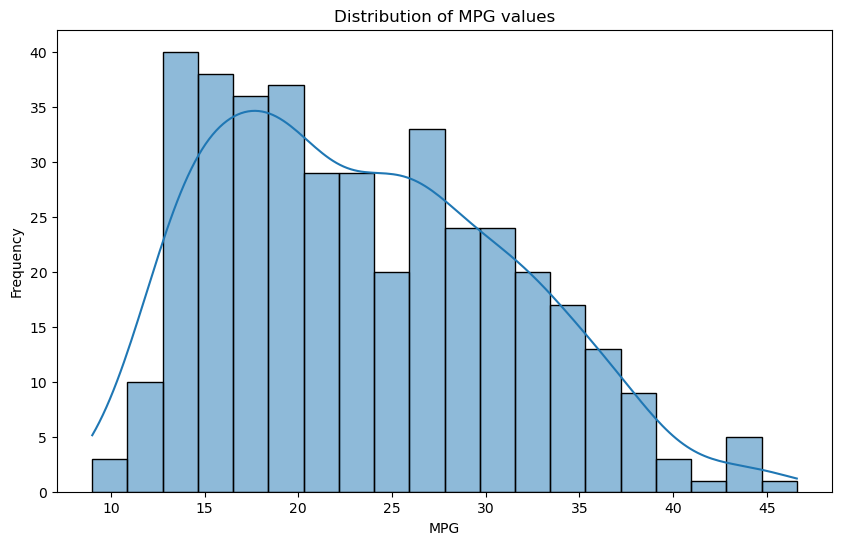

In [26]:
# plot histogram to visualize fuel efficiency among cars

plt.figure(figsize=(10, 6))
sns.histplot(data['mpg'], bins=20, kde=True)
plt.title('Distribution of MPG values')
plt.xlabel('MPG')
plt.ylabel('Frequency')
plt.show()

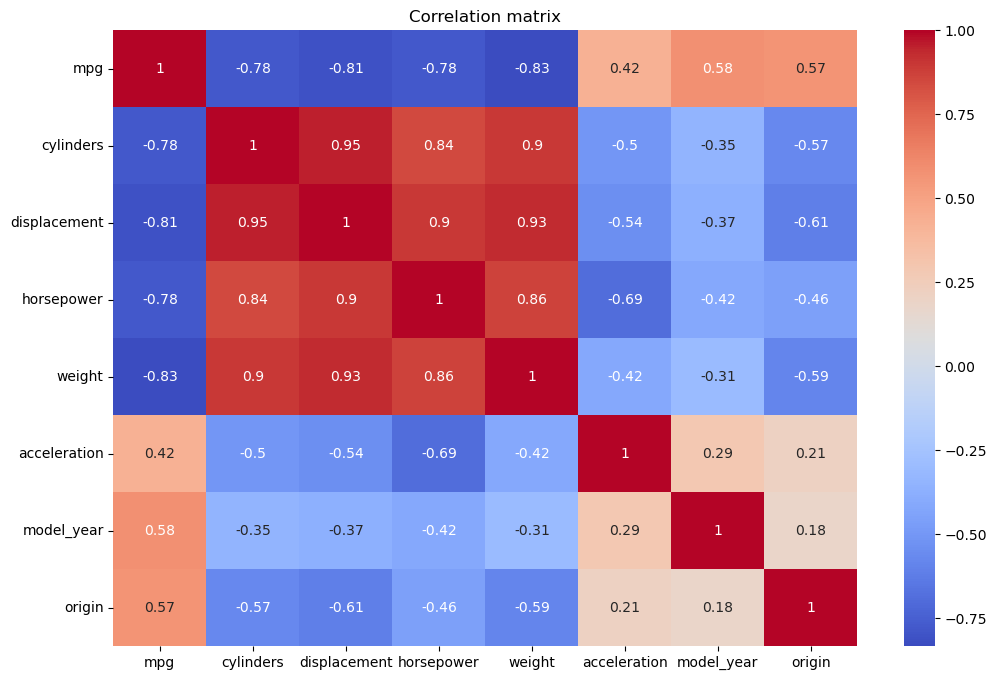

In [25]:
# check relations between numeric variables

plt.figure(figsize=(12, 8))
correlation_matrix = data.select_dtypes(include=[np.number]).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation matrix')
plt.show()

In [16]:
# target values
X = data[['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration']]
y = data['mpg']

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [21]:
y_pred = model.predict(X_test)

In [22]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

Mean Squared Error: 17.93917197663127
R^2 Score: 0.6485312110889081


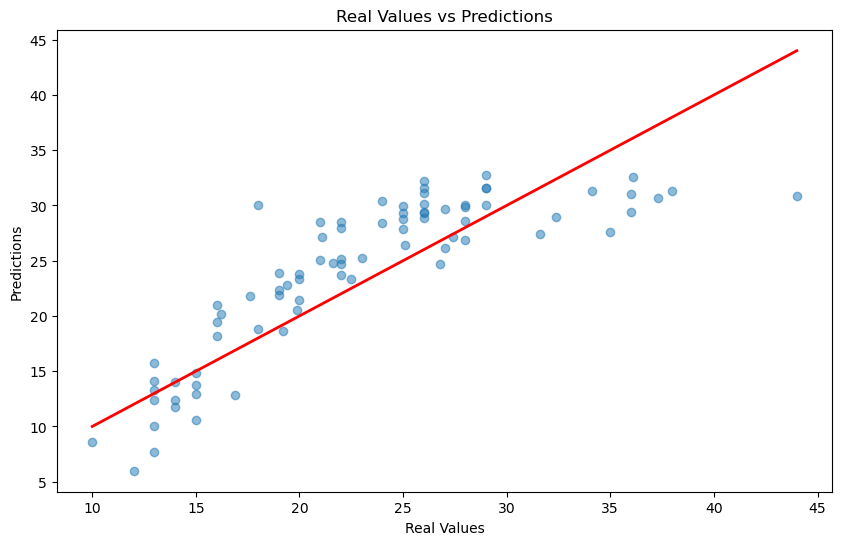

Mean Squared Error: 17.93917197663127
R^2 Score: 0.6485312110889081


In [24]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)
plt.title('Real Values vs Predictions')
plt.xlabel('Real Values')
plt.ylabel('Predictions')
plt.show()

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')